In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def stats_to_tables_categorial(stats, code_to_names):
    sub_stats = stats["categorial"]
    table_data1, table_data2 = [], []
    table_data1.append(["No. (Control)", "% (Control)", "No. (Treated)", "% (Treated)"])
    table_data2.append(["Chi Square", "Pvalue"])
    for field, values in sub_stats.items(): # gender, ..
        print(field)
        print(sub_stats[field])
        relevant_keys = set()
        for part1 in ["counts", "precentage"]:
            for part2 in ["treated", "control"]:
                print(sub_stats[field][part1][part2])
                relevant_keys.update(list(sub_stats[field][part1][part2].keys()))
        for part1 in ["counts", "precentage"]:
            for part2 in ["treated", "control"]:
                for key in relevant_keys:
                    if key not in sub_stats[field][part1][part2].keys():
                        sub_stats[field][part1][part2][key] = 0
        print(sorted(list(relevant_keys), key=lambda x: int(x)))
        for key in sorted(list(relevant_keys), key=lambda x: int(x)):
            field_for_code = "_".join(field.split("_")[:-1]) if len(field.split("_")) > 1 else field
            table_data1.append([f"{field}: {code_to_names[field_for_code][key]}",
                                sub_stats[field]["counts"]["control"][key],
                                sub_stats[field]["precentage"]["control"][key],
                                sub_stats[field]["counts"]["treated"][key],
                                sub_stats[field]["precentage"]["treated"][key]])
        table_data2.append([f"{field}",
                               round(sub_stats[field]["statistic"], 3),
                               round(sub_stats[field]["pval"], 3)])
    return table_data1, table_data2
                                   

def stats_to_tables_continous(stats, code_to_names):
    sub_stats = stats["continous"]
    table_data1, table_data2 = [], []
    table_data1.append(["Mean (Control)", "Var (Control)", "Mean (Treated)", "Var (Treated)"])
    table_data2.append(["T-Statistic", "Pvalue"])
    for field, values in sub_stats.items():
        table_data1.append([f"{field}:",
                            sub_stats[field]["mean"]["control"],
                            sub_stats[field]["var"]["control"],
                            sub_stats[field]["mean"]["treated"],
                            sub_stats[field]["var"]["treated"]])
        table_data2.append([f"{field}:",                           
                           round(sub_stats[field]["statistic"], 3),
                           round(sub_stats[field]["pval"], 3)])
    return table_data1, table_data2
                                   

def show_table(data, title_text, footer_text, num_type, file_name):
    fig_background_color = 'skyblue'
    fig_border = 'steelblue'
    """data =  [
                [         'Freeze', 'Wind', 'Flood', 'Quake', 'Hail'],
                [ '5 year',  66386, 174296,   75131,  577908,  32015],
                ['10 year',  58230, 381139,   78045,   99308, 160454],
                ['20 year',  89135,  80552,  152558,  497981, 603535],
                ['30 year',  78415,  81858,  150656,  193263,  69638],
                ['40 year', 139361, 331509,  343164,  781380,  52269],
            ]# Pop the headers from the data array"""
    column_headers = data.pop(0)
    row_headers = [x.pop(0) for x in data]# Table data needs to be non-numeric text. Format the data
    # while I'm at it.
    cell_text = []
    for row in data:
        if num_type == "float":
            cell_text.append([f'{x}' for x in row])# Get some lists of color specs for row and column headers
        elif num_type == "int":
            cell_text.append([f'{x:1.0f}' for x in row])# Get some lists of color specs for row and column headers
    rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
    ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))# Create the figure. Setting a small pad on tight_layout
    # seems to better regulate white space. Sometimes experimenting
    # with an explicit figsize here can produce better outcome.
    plt.figure(linewidth=2,
               edgecolor=fig_border,
               facecolor=fig_background_color,
               tight_layout={'pad':1},
               #figsize=(5,3)
              )# Add a table at the bottom of the axes
    the_table = plt.table(cellText=cell_text,
                          rowLabels=row_headers,
                          rowColours=rcolors,
                          rowLoc='right',
                          colColours=ccolors,
                          colLabels=column_headers,
                          loc='center')# Scaling is the only influence we have over top and bottom cell padding.
    # Make the rows taller (i.e., make cell y scale larger).
    the_table.scale(1, 1.5)# Hide axes
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)# Hide axes border
    plt.box(on=None)# Add title
    plt.suptitle(title_text)# Add footer
    plt.figtext(0.95, 0.05, footer_text, horizontalalignment='right', size=6, weight='light')# Force the figure to update, so backends center objects correctly within the figure.
    # Without plt.draw() here, the title will center on the axes and not the figure.
    plt.draw()# Create image. plt.savefig ignores figure edge and face colors, so map them.
    fig = plt.gcf()
    plt.tight_layout()
    plt.savefig(file_name,
                bbox='tight',
                bbox_inches='tight',
                edgecolor=fig.get_edgecolor(),
                facecolor=fig.get_facecolor(),
                dpi = 150
                )

In [5]:
hh_dict = {str(i): str(i) for i in range(20)}
hh_dict["20+"] = "20+"
hh_dict["-1"] = "Missing value"

children_dict = {str(i): str(i) for i in range(20)}
children_dict["10+"] = "10+"
children_dict["-1"] = "Missing value"

code_to_names_categorial = {"gender": {"1": "Male", 
                                       "2": "Female",
                                      "-1": "Missing value"},
                           "ENROLLSTAT": {"1": "Not enrolled, no high school degree, no GED",
                                          "2": "Not enrolled, GED",
                                         "3": "Not enrolled, high school degree",
                                         "4": "Not enrolled, some college",
                                         "5": "Not enrolled, 2-year college graduate",
                                         "6": "Not enrolled, 4-year college graduate",
                                         "7": "Not enrolled, graduate degree",
                                         "8": "Enrolled in grades 1-12, not a high school graduate",
                                         "9": "Enrolled in a 2-year college",
                                         "10": "Enrolled in a 4-year college",
                                         "11": "Enrolled in a graduate program",
                                         "-1": "Missing value"},
                           "CV_HH_SIZE": hh_dict,
                           "CV_HIGHEST_DEGREE": {"0": "None",
                                                "1": "GED",
                                                "2": "High School Diploma",
                                                "3": "Associate/Junior college",
                                                "4": "Bachelor's degree",
                                                "5": "Master's degree",
                                                "6": "PhD",
                                                "7": "Professional degree",
                                                "-1": "Missing value"},
                           "marital_status": {"1": "Never married, cohabiting",
                                             "2": "Never married, not cohabiting",
                                             "3": "Married, spouse present",
                                             "4": "Married, spouse absent",
                                             "5": "Separated, cohabiting",
                                             "6": "Separated, not cohabiting",
                                             "7": "Divorced, cohabiting",
                                             "8": "Divorced, not cohabiting",
                                             "9": "Widowed, cohabiting",
                                             "10": "Widowed, not cohabiting",
                                             "-1": "Missing value"},
                           "BIO_CHILD_HH": children_dict,
                           "URBAN-RURAL": {"0": "Rural",
                                          "1": "Urban",
                                          "2": "Unknown",
                                          "-1": "Missing value"},
                           "health": {"1": "Excellent",
                                     "2": "Very good",
                                     "3": "Good",
                                     "4": "Fair",
                                     "5": "Poor",
                                     "-1": "Missing value"}}

In [9]:
def generate_tables(stats, years):
    result = stats_to_tables_continous(stats, {})
    show_table(result[1], f"Continous Values - {years}", "", "float", f"continous_chi_pvalue_{years}.png")
    show_table(result[0], f"Continous Values - {years}", "Example", "int", f"continous_mean_var_{years}.png")
    result = stats_to_tables_categorial(stats, code_to_names_categorial)
    show_table(result[0], "", "", "int", f"categorial_counts_percentage_{years}.png")
    show_table(result[1], "", "", "float", f"categorial_chi_pvalue_{years}.png")

<ipython-input-4-e87939dabaea>:99: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(file_name,


ENROLLSTAT_2010
{'counts': {'treated': {'4': 238, '3': 142, '6': 132, '5': 71, '1': 66, '9': 65, '10': 60, '2': 59, '11': 39, '7': 28, '8': 9, '-1': 7}, 'control': {'3': 785, '4': 684, '1': 494, '2': 405, '6': 214, '5': 122, '9': 104, '10': 77, '7': 39, '11': 28, '-1': 21, '8': 20}}, 'precentage': {'treated': {'4': 26, '3': 16, '6': 14, '5': 8, '1': 7, '9': 7, '10': 7, '2': 6, '11': 4, '7': 3, '8': 1, '-1': 1}, 'control': {'3': 26, '4': 23, '1': 17, '2': 14, '6': 7, '5': 4, '9': 3, '10': 3, '7': 1, '11': 1, '-1': 1, '8': 1}}, 'pval': 0.9999999961146475, 'statistic': 0.1677120621758481}
{'4': 238, '3': 142, '6': 132, '5': 71, '1': 66, '9': 65, '10': 60, '2': 59, '11': 39, '7': 28, '8': 9, '-1': 7}
{'3': 785, '4': 684, '1': 494, '2': 405, '6': 214, '5': 122, '9': 104, '10': 77, '7': 39, '11': 28, '-1': 21, '8': 20}
{'4': 26, '3': 16, '6': 14, '5': 8, '1': 7, '9': 7, '10': 7, '2': 6, '11': 4, '7': 3, '8': 1, '-1': 1}
{'3': 26, '4': 23, '1': 17, '2': 14, '6': 7, '5': 4, '9': 3, '10': 3, '7

<ipython-input-4-e87939dabaea>:96: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.draw()# Create image. plt.savefig ignores figure edge and face colors, so map them.
<ipython-input-4-e87939dabaea>:98: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
<ipython-input-4-e87939dabaea>:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.savefig(file_name,


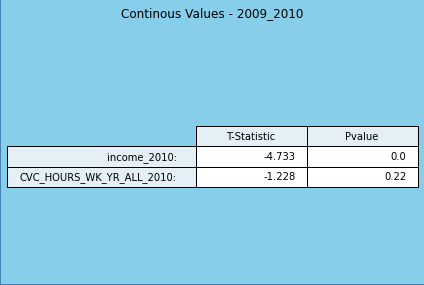

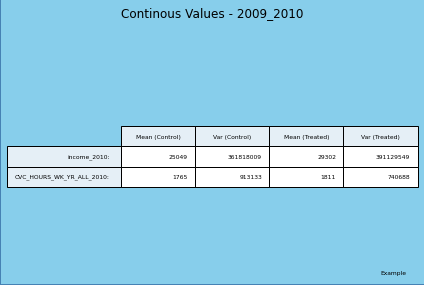

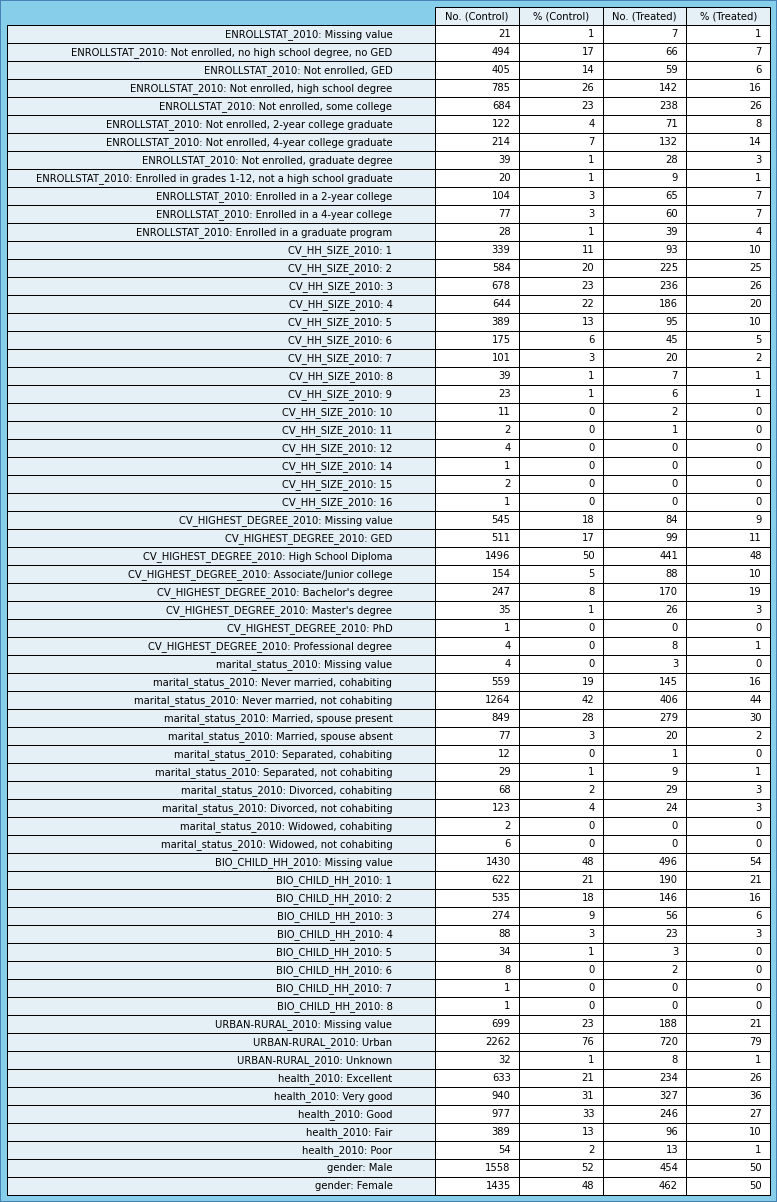

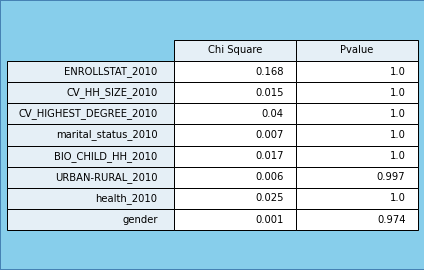

In [10]:
with open("stats_2009_2010.json") as fp:
    stats = json.load(fp)
    generate_tables(stats, "2009_2010")

<ipython-input-4-e87939dabaea>:99: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(file_name,


CV_HIGHEST_DEGREE_2011
{'counts': {'treated': {'2': 437, '4': 159, '1': 110, '3': 76, '-1': 62, '5': 24, '7': 2, '6': 1}, 'control': {'2': 1453, '-1': 557, '1': 489, '4': 233, '3': 133, '5': 32, '7': 4, '6': 1}}, 'precentage': {'treated': {'2': 50, '4': 18, '1': 13, '3': 9, '-1': 7, '5': 3, '7': 0, '6': 0}, 'control': {'2': 50, '-1': 19, '1': 17, '4': 8, '3': 5, '5': 1, '7': 0, '6': 0}}, 'pval': 0.9999999397347724, 'statistic': 0.03502282315725358}
{'2': 437, '4': 159, '1': 110, '3': 76, '-1': 62, '5': 24, '7': 2, '6': 1}
{'2': 1453, '-1': 557, '1': 489, '4': 233, '3': 133, '5': 32, '7': 4, '6': 1}
{'2': 50, '4': 18, '1': 13, '3': 9, '-1': 7, '5': 3, '7': 0, '6': 0}
{'2': 50, '-1': 19, '1': 17, '4': 8, '3': 5, '5': 1, '7': 0, '6': 0}
['-1', '1', '2', '3', '4', '5', '6', '7']
ENROLLSTAT_2011
{'counts': {'treated': {'4': 235, '6': 137, '3': 136, '2': 75, '5': 63, '10': 57, '9': 52, '1': 50, '7': 33, '11': 24, '-1': 6, '8': 3}, 'control': {'3': 743, '4': 672, '1': 476, '2': 400, '6': 219,

<ipython-input-4-e87939dabaea>:96: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.draw()# Create image. plt.savefig ignores figure edge and face colors, so map them.
<ipython-input-4-e87939dabaea>:98: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
<ipython-input-4-e87939dabaea>:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.savefig(file_name,


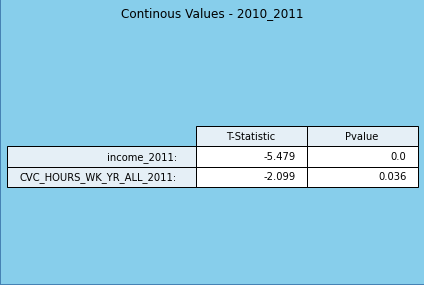

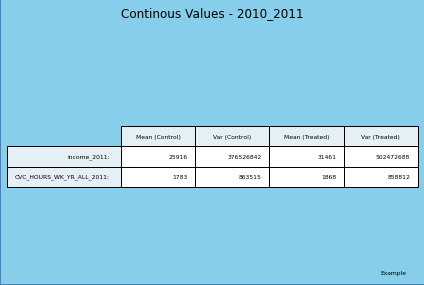

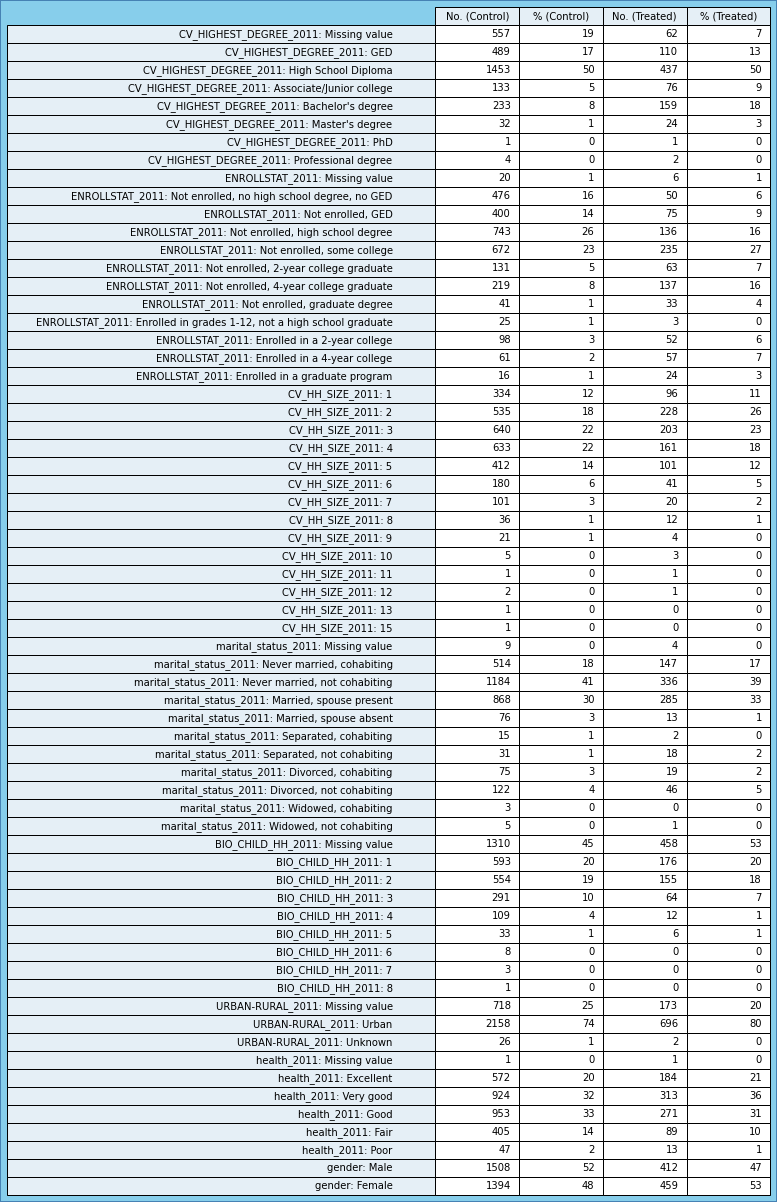

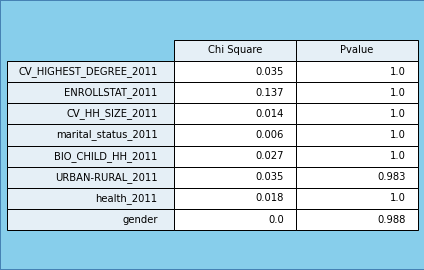

In [11]:
with open("stats_2010_2011.json") as fp:
    stats = json.load(fp)
    generate_tables(stats, "2010_2011")